# <center> United States Counties Clustering Analysis
We are going to form meaningful groups of United States (US) counties based on different sources of information and data.

## Introducing the case study

During the 2020 US presidential election, there was a notable recognition that an individual's place of residence is a key predictor of their future decisions, particularly in terms of voting behavior. While this realization holds personal significance, it translates into a profound understanding worth billions for national corporations like Starbucks, Walmart, and Amazon. Additionally, this insight is highly advantageous for politicians at the federal, state, and local levels during elections and legislative processes.

For these entities, unlocking these advantages relies on their ability to conduct meaningful analyses of geographic locations and demographic groups. In the upcoming case study, we will explore and compare the distinctions and similarities among US counties.

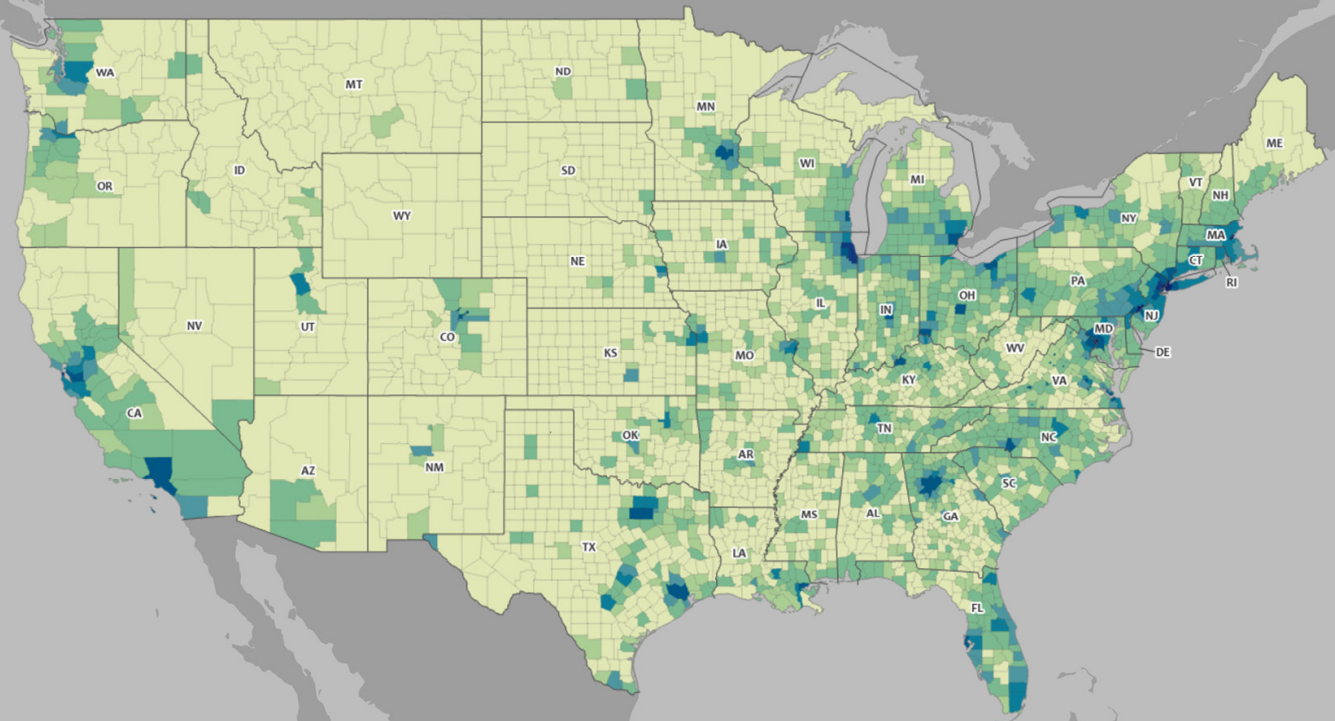

                                                          Figure 1 – US demographic data map at a county level

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Introduction to the source of the data

We will leverage data from the following two sources to construct a dataset, enabling us to conduct county clustering analysis:

* The four files Education.xls, PopulationEstimates.xls, PovertyEstimates.xls, and
Unemployment.xlsx from the US Department of Agriculture Economic Research Service (USDA ERS)

* US election results from Massachusetts Institute of Technology (MIT) election data

### First Data Source

https://www.ers.usda.gov/data-products/county-level-data-sets/

- Education.xls
- PopulationEstimates.xls
- PovertyEstimates.xls
- Unemployment.xlsx

#### Education.xls

In [2]:
edu_df = pd.read_excel('../datasets/Education.xls')
edu_df

Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019   
0     Sources: U.S. Census Bureau, 1970, 1980, 1990,...                                                \
1     For definitions of rural classifications, see ...                                                 
2     This table was prepared by USDA, Economic Rese...                                                 
3                                             FIPS Code                                                 
4                                                 00000                                                 
...                                                 ...                                                 
3282                                              72145                                                 
3283                                              72147                                                 
3284                                              72149                                                 
3285                                              72151                                                 
3286                                              72153                                                 

     Unnamed: 1           Unnamed: 2                       Unnamed: 3   
0           NaN                  NaN                              NaN  \
1           NaN                  NaN                              NaN   
2           NaN                  NaN                              NaN   
3         State            Area name  2003 Rural-urban Continuum Code   
4            US        United States                              NaN   
...         ...                  ...                              ...   
3282         PR  Vega Baja Municipio                                1   
3283         PR    Vieques Municipio                                7   
3284         PR   Villalba Municipio                                2   
3285         PR    Yabucoa Municipio                                1   
3286         PR      Yauco Municipio                                3   

                     Unnamed: 4                       Unnamed: 5   
0                           NaN                              NaN  \
1                           NaN                              NaN   
2                           NaN                              NaN   
3     2003 Urban Influence Code  2013 Rural-urban Continuum Code   
4                           NaN                              NaN   
...                         ...                              ...   
3282                          1                                1   
3283                         12                                7   
3284                          2                                2   
3285                          1                                1   
3286                          2                                2   

                     Unnamed: 6                             Unnamed: 7   
0                           NaN                                    NaN  \
1                           NaN                                    NaN   
2                           NaN                                    NaN   
3     2013 Urban Influence Code  Less than a high school diploma, 1970   
4                           NaN                               52373312   
...                         ...                                    ...   
3282                          1                                    NaN   
3283                         12                                    NaN   
3284                          2                                    NaN   
3285                          1                                    NaN   
3286                          2                                    NaN   

                          Unnamed: 8                      Unnamed: 9  ...   
0                                NaN                             NaN  ...  \
1      

#### PopulationEstimates.xls

In [3]:
pop_df = pd.read_excel('../datasets/PopulationEstimates.xls')
pop_df

Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)   
0     These data were posted to the ERS website (at ...                                                                                     \
1                                               FIPStxt                                                                                      
2                                                 00000                                                                                      
3                                                 01000                                                                                      
4                                                 01001                                                                                      
...                                                 ...                                                                                      
3270                                              72145                                                                                      
3271                                              72147                                                                                      
3272                                              72149                                                                                      
3273                                              72151                                                                                      
3274                                              72153                                                                                      

     Unnamed: 1                        Unnamed: 2   
0           NaN                               NaN  \
1         State                         Area_Name   
2            US                     United States   
3            AL                           Alabama   
4            AL                    Autauga County   
...         ...                               ...   
3270         PR  Vega Baja Municipio, Puerto Rico   
3271         PR    Vieques Municipio, Puerto Rico   
3272         PR   Villalba Municipio, Puerto Rico   
3273         PR    Yabucoa Municipio, Puerto Rico   
3274         PR      Yauco Municipio, Puerto Rico   

                           Unnamed: 3                       Unnamed: 4   
0                                 NaN                              NaN  \
1     Rural-urban_Continuum Code_2003  Rural-urban_Continuum Code_2013   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                   2                                2   
...                               ...                              ...   
3270                                1                                1   
3271                                7                                7   
3272                                2                                2   
3273                                1                                1   
3274                                3                                2   

                     Unnamed: 5                 Unnamed: 6   
0                           NaN                        NaN  \
1     Urban_Influence_Code_2003  Urban_Influence_Code_2013   
2                           NaN                        NaN   
3                           NaN                        NaN   
4                             2                          2   
...                         ...                        ...   
3270                          1                          1   
3271                         12                         12   
3272                          2                          2   
3273                          1                          1   
3274                          2                          2   

                  Unnamed: 7 

In [4]:
pov_df = pd.read_excel('../datasets/PovertyEstimates.xls')
pov_df

Poverty estimates for the U.S., States, and counties, 2019 Unnamed: 1   
0     Source: U.S. Department of Commerce, Bureau of...                NaN  \
1     For definitions of rural classifications, see ...                NaN   
2     This table was prepared by USDA, Economic Rese...                NaN   
3                                               FIPStxt              Stabr   
4                                                 00000                 US   
...                                                 ...                ...   
3192                                              56037                 WY   
3193                                              56039                 WY   
3194                                              56041                 WY   
3195                                              56043                 WY   
3196                                              56045                 WY   

             Unnamed: 2                       Unnamed: 3   
0                   NaN                              NaN  \
1                   NaN                              NaN   
2                   NaN                              NaN   
3             Area_name  Rural-urban_Continuum_Code_2003   
4         United States                              NaN   
...                 ...                              ...   
3192  Sweetwater County                                5   
3193       Teton County                                7   
3194       Uinta County                                7   
3195    Washakie County                                7   
3196      Weston County                                7   

                     Unnamed: 4                       Unnamed: 5   
0                           NaN                              NaN  \
1                           NaN                              NaN   
2                           NaN                              NaN   
3     Urban_Influence_Code_2003  Rural-urban_Continuum_Code_2013   
4                           NaN                              NaN   
...                         ...                              ...   
3192                          8                                5   
3193                          8                                7   
3194                          8                                7   
3195                         11                                7   
3196                          9                                7   

                     Unnamed: 6   Unnamed: 7      Unnamed: 8      Unnamed: 9   
0                           NaN          NaN             NaN             NaN  \
1                           NaN          NaN             NaN             NaN   
2                           NaN          NaN             NaN             NaN   
3     Urban_Influence_Code_2013  POVALL_2019  CI90LBALL_2019  CI90UBALL_2019   
4                           NaN     39490096        39248096        39732096   
...                         ...          ...             ...             ...   
3192                          8         3453            2743            4163   
3193                          8         1396            1073            1719   
3194                          8         1699            1264            2134   
3195                         11          845             626            1064   
3196                          9          692             523             861   

      ...      Unnamed: 24    Unnamed: 25     Unnamed: 26     Unnamed: 27   
0     ...              NaN            NaN             NaN             NaN  \
1     ...              NaN            NaN             NaN             NaN   
2     ...              NaN            NaN             NaN             NaN   
3     ...  CI90UB517P_2019  MEDHHINC_2019  CI90LBINC_2019  CI90UBINC_2019   
4     ...               16          65712           65594           65830   
...   ...              ...            ...             ...             ...   
3192  ...             11.1    

#### Unemployment.xlsx

In [5]:
employment_df = pd.read_excel('../datasets/Unemployment.xlsx')
employment_df

Unemployment and median household income for the United States, States, and counties, 2000-20   
0     Sources: Unemployment: U.S. Department of Labo...                                             \
1     For definitions of rural classifications, see ...                                              
2     This table was prepared by USDA, Economic Rese...                                              
3                                             FIPS_Code                                              
4                                                 00000                                              
...                                                 ...                                              
3274                                              72145                                              
3275                                              72147                                              
3276                                              72149                                              
3277                                              72151                                              
3278                                              72153                                              

     Unnamed: 1               Unnamed: 2                       Unnamed: 3   
0           NaN                      NaN                              NaN  \
1           NaN                      NaN                              NaN   
2           NaN                      NaN                              NaN   
3         State                Area_name  Rural_urban_continuum_code_2013   
4            US            United States                              NaN   
...         ...                      ...                              ...   
3274         PR  Vega Baja Municipio, PR                                1   
3275         PR    Vieques Municipio, PR                                7   
3276         PR   Villalba Municipio, PR                                2   
3277         PR    Yabucoa Municipio, PR                                1   
3278         PR      Yauco Municipio, PR                                2   

                     Unnamed: 4  Unnamed: 5                 Unnamed: 6   
0                           NaN         NaN                        NaN  \
1                           NaN         NaN                        NaN   
2                           NaN         NaN                        NaN   
3     Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2000   
4                           NaN         NaN                  142601576   
...                         ...         ...                        ...   
3274                          1           1                      19805   
3275                         12           0                       2441   
3276                          2           1                       7636   
3277                          1           1                      10613   
3278                          2           1                      14664   

         Unnamed: 7       Unnamed: 8              Unnamed: 9  ...   
0               NaN              NaN                     NaN  ...  \
1               NaN              NaN                     NaN  ...   
2               NaN              NaN                     NaN  ...   
3     Employed_2000  Unemployed_2000  Unemployment_rate_2000  ...   
4         136904853          5696723                3.994853  ...   
...             ...              ...                     ...  ...   
3274          17607             2198                    11.1  ...   
3275           2120              321                    13.2  ...   
3276           6648              988                    12.9  ...   
3277           9005             1608                    15.2  ...   
3278          12871             1793                    12.2  ...   

                    Unnamed: 82    Unnamed: 83      Unnamed: 84   
0                           NaN            NaN              NaN  \
1  

### Second Data Source

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

- dataverse_files.zip if unzipped includes: countypres_2000-2020.csv

In [6]:
election_df = pd.read_csv('../datasets/countypres_2000-2020.csv')
election_df

year    state state_po county_name  county_fips        office   
0      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT  \
1      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
2      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
3      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
4      2000  ALABAMA       AL     BALDWIN       1003.0     PRESIDENT   
...     ...      ...      ...         ...          ...           ...   
72612  2020  WYOMING       WY    WASHAKIE      56043.0  US PRESIDENT   
72613  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72614  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72615  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72616  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   

               candidate        party  candidatevotes  totalvotes   version   
0                AL GORE     DEMOCRAT          4942.0     17208.0  20191203  \
1         GEORGE W. BUSH   REPUBLICAN         11993.0     17208.0  20191203   
2            RALPH NADER        GREEN           160.0     17208.0  20191203   
3                  OTHER        OTHER           113.0     17208.0  20191203   
4                AL GORE     DEMOCRAT         13997.0     56480.0  20191203   
...                  ...          ...             ...         ...       ...   
72612     DONALD J TRUMP   REPUBLICAN          3245.0      4032.0  20210622   
72613  JOSEPH R BIDEN JR     DEMOCRAT           360.0      3560.0  20210622   
72614       JO JORGENSEN  LIBERTARIAN            46.0      3560.0  20210622   
72615              OTHER        OTHER            47.0      3560.0  20210622   
72616     DONALD J TRUMP   REPUBLICAN          3107.0      3560.0  20210622   

        mode  
0      TOTAL  
1      TOTAL  
2      TOTAL  
3      TOTAL  
4      TOTAL  
...      ...  
72612  TOTAL  
72613  TOTAL  
72614  TOTAL  
72615  TOTAL  
72616  TOTAL  

[72617 rows x 12 columns]

## The preprocessing

### Transforming election_df to partisan_df

In [7]:
BM = election_df['mode'] == 'TOTAL'
election_df = pd.DataFrame(election_df[BM].drop(columns = ['mode']))
election_df

year    state state_po county_name  county_fips        office   
0      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT  \
1      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
2      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
3      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
4      2000  ALABAMA       AL     BALDWIN       1003.0     PRESIDENT   
...     ...      ...      ...         ...          ...           ...   
72612  2020  WYOMING       WY    WASHAKIE      56043.0  US PRESIDENT   
72613  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72614  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72615  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72616  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   

               candidate        party  candidatevotes  totalvotes   version  
0                AL GORE     DEMOCRAT          4942.0     17208.0  20191203  
1         GEORGE W. BUSH   REPUBLICAN         11993.0     17208.0  20191203  
2            RALPH NADER        GREEN           160.0     17208.0  20191203  
3                  OTHER        OTHER           113.0     17208.0  20191203  
4                AL GORE     DEMOCRAT         13997.0     56480.0  20191203  
...                  ...          ...             ...         ...       ...  
72612     DONALD J TRUMP   REPUBLICAN          3245.0      4032.0  20210622  
72613  JOSEPH R BIDEN JR     DEMOCRAT           360.0      3560.0  20210622  
72614       JO JORGENSEN  LIBERTARIAN            46.0      3560.0  20210622  
72615              OTHER        OTHER            47.0      3560.0  20210622  
72616     DONALD J TRUMP   REPUBLICAN          3107.0      3560.0  20210622  

[60583 rows x 11 columns]

In [8]:
election_df.groupby(['state_po', 'county_fips']).size().index

MultiIndex([('AK',  2001.0),
            ('AK',  2002.0),
            ('AK',  2003.0),
            ('AK',  2004.0),
            ('AK',  2005.0),
            ('AK',  2006.0),
            ('AK',  2007.0),
            ('AK',  2008.0),
            ('AK',  2009.0),
            ('AK',  2010.0),
            ...
            ('WY', 56027.0),
            ('WY', 56029.0),
            ('WY', 56031.0),
            ('WY', 56033.0),
            ('WY', 56035.0),
            ('WY', 56037.0),
            ('WY', 56039.0),
            ('WY', 56041.0),
            ('WY', 56043.0),
            ('WY', 56045.0)],
           names=['state_po', 'county_fips'], length=3155)

In [9]:
partisanElection_df =pd.DataFrame(index=election_df.groupby(['state_po', 'county_name', 'year']).size().index, columns=['partisanism'])
partisanElection_df

partisanism
state_po county_name year            
AK       DISTRICT 1  2000         NaN
                     2004         NaN
                     2008         NaN
                     2012         NaN
                     2016         NaN
...                               ...
WY       WESTON      2004         NaN
                     2008         NaN
                     2012         NaN
                     2016         NaN
                     2020         NaN

[18050 rows x 1 columns]

In [10]:
for i, row in partisanElection_df.iterrows():
    state = i[0]
    county = i[1]
    year = i[2]
    
    BM = (election_df.state_po==state) & (election_df.county_name==county) & (election_df.year == year)
    
    wdf = election_df[BM]
    
    numerator = 0
    denominator = 0
    for wi, wrow in wdf.iterrows():
        denominator += wrow.candidatevotes
        if (wrow.party =='DEMOCRAT'):
            numerator += wrow.candidatevotes
        if (wrow.party =='REPUBLIC'):
            numerator += wrow.candidatevotes
    partisanism = numerator/denominator
    partisanElection_df.at[i,'partisanism'] = partisanism

In [11]:
partisanElection_df

partisanism
state_po county_name year            
AK       DISTRICT 1  2000    0.192909
                     2004    0.351541
                     2008    0.372597
                     2012    0.196581
                     2016    0.387617
...                               ...
WY       WESTON      2004    0.170991
                     2008    0.192736
                     2012    0.125633
                     2016    0.084799
                     2020    0.101124

[18050 rows x 1 columns]

In [12]:
partisanElection_df.reset_index(drop=False, inplace=True)
partisanElection_df

state_po county_name  year partisanism
0           AK  DISTRICT 1  2000    0.192909
1           AK  DISTRICT 1  2004    0.351541
2           AK  DISTRICT 1  2008    0.372597
3           AK  DISTRICT 1  2012    0.196581
4           AK  DISTRICT 1  2016    0.387617
...        ...         ...   ...         ...
18045       WY      WESTON  2004    0.170991
18046       WY      WESTON  2008    0.192736
18047       WY      WESTON  2012    0.125633
18048       WY      WESTON  2016    0.084799
18049       WY      WESTON  2020    0.101124

[18050 rows x 4 columns]

In [13]:
partisan_df = pd.DataFrame(index=election_df.groupby(['state_po', 'county_name']).size().index, columns=['mean', 'slope'])
partisan_df

mean slope
state_po county_name           
AK       DISTRICT 1   NaN   NaN
         DISTRICT 10  NaN   NaN
         DISTRICT 11  NaN   NaN
         DISTRICT 12  NaN   NaN
         DISTRICT 13  NaN   NaN
...                   ...   ...
WY       SWEETWATER   NaN   NaN
         TETON        NaN   NaN
         UINTA        NaN   NaN
         WASHAKIE     NaN   NaN
         WESTON       NaN   NaN

[3151 rows x 2 columns]

In [14]:
def linearFunction(t,a,b):
    y = a + b*t
    return y

In [15]:
from scipy.optimize import curve_fit

for i, row in partisan_df.iterrows():
    state= i[0]
    county= i[1]
    
    BM = (partisanElection_df.state_po== state) & (
        partisanElection_df.county_name==county) 
    
    wdf = partisanElection_df[BM]
    BM_MV = wdf.partisanism.isna()
    n = len(wdf) - sum(BM_MV)
    
    x_data = range(n)
    y_data = wdf[~BM_MV].partisanism
    
    if(n<=1):
        #'Just one datapoint avaiable!'
        
        mean = wdf[~BM_MV]
        slope = 0
    else:
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        
        mean = wdf[~BM_MV].partisanism.mean()
        slope = p[1]
    
    partisan_df.at[i,'mean'] = mean
    partisan_df.at[i,'slope'] = slope

In [16]:
partisan_df

mean     slope
state_po county_name                    
AK       DISTRICT 1   0.329439  0.038418
         DISTRICT 10  0.267611 -0.017341
         DISTRICT 11  0.253167 -0.001146
         DISTRICT 12  0.261069 -0.006977
         DISTRICT 13  0.317873  0.003017
...                        ...       ...
WY       SWEETWATER   0.285726 -0.030532
         TETON        0.550468  0.042895
         UINTA        0.203841 -0.017252
         WASHAKIE     0.193867 -0.012725
         WESTON       0.137002 -0.015821

[3151 rows x 2 columns]

In [17]:
partisan_df = partisan_df.reset_index()

In [18]:
partisan_df.county_name = partisan_df.county_name.str.lower()

In [19]:
partisan_df.columns = ['State','County_Name','Mean_Partisanism','Slope_Partisanism']

In [20]:
partisan_df.set_index(['State','County_Name'],inplace=True)

In [21]:
partisan_df

Mean_Partisanism Slope_Partisanism
State County_Name                                   
AK    district 1          0.329439          0.038418
      district 10         0.267611         -0.017341
      district 11         0.253167         -0.001146
      district 12         0.261069         -0.006977
      district 13         0.317873          0.003017
...                            ...               ...
WY    sweetwater          0.285726         -0.030532
      teton               0.550468          0.042895
      uinta               0.203841         -0.017252
      washakie            0.193867         -0.012725
      weston              0.137002         -0.015821

[3151 rows x 2 columns]

### Cleaning edu_df, employ_df, pop_df, pov_df

#### edu_df

In [22]:
edu_df.columns = edu_df.iloc[3].values
edu_df = edu_df.drop(index =[0,1,2,3]).reset_index(drop=True)

In [23]:
edu_df = pd.DataFrame(edu_df[['State','Area name',"Percent of adults with a bachelor's degree or higher, 2015-19"]])

In [24]:
edu_df.columns = ['State','Area_Name',"Percent of adults with a bachelor's degree or higher, 2015-19"]

In [25]:
def SeperateArea_Name(v):
    s_parts = v.split(' ')
    
    if(len(s_parts)>1):
        return(s_parts[-1])

In [26]:
BM = edu_df.Area_Name.apply(SeperateArea_Name) == 'County'
droping_indices = edu_df[~BM].index
edu_df.drop(index = droping_indices,inplace=True)

In [27]:
edu_df.reset_index(drop=True,inplace=True)

In [28]:
edu_df['County_Name'] = edu_df.Area_Name.apply(lambda v: v[:v.find('County')-1])

In [29]:
edu_df.County_Name = edu_df.County_Name.str.lower()

In [30]:
edu_df = edu_df.drop(columns = ['Area_Name']).set_index(['State','County_Name'])

In [31]:
edu_df.columns = ['HigherEdPercent']

In [32]:
edu_df

HigherEdPercent
State County_Name                
AL    autauga           26.571573
      baldwin           31.862459
      barbour           11.578713
      bibb              10.378526
      blount            13.093413
...                           ...
WY    sweetwater         22.49839
      teton             57.005138
      uinta             16.029003
      washakie          23.386225
      weston            19.972479

[3007 rows x 1 columns]

#### pop_df

In [33]:
pop_df.columns = pop_df.iloc[1].values
pop_df = pop_df.drop(index =[0,1]).reset_index(drop=True)

In [34]:
pop_df = pd.DataFrame(pop_df[['State','Area_Name','CENSUS_2010_POP']])

In [35]:
BM = pop_df.Area_Name.apply(SeperateArea_Name) == 'County'
droping_indices = pop_df[~BM].index
pop_df.drop(index = droping_indices,inplace=True)

In [36]:
pop_df.reset_index(drop=True,inplace=True)

In [37]:
pop_df['County_Name'] = pop_df.Area_Name.apply(lambda v: v[:v.find('County')-1])

In [38]:
pop_df.County_Name = pop_df.County_Name.str.lower()

In [39]:
pop_df = pop_df.drop(columns = ['Area_Name']).set_index(['State','County_Name'])

In [40]:
pop_df.columns = ['Population']

In [41]:
pop_df

Population
State County_Name           
AL    autauga          54571
      baldwin         182265
      barbour          27457
      bibb             22915
      blount           57322
...                      ...
WY    sweetwater       43806
      teton            21294
      uinta            21118
      washakie          8533
      weston            7208

[3007 rows x 1 columns]

#### pov_df

In [42]:
pov_df.columns = pov_df.iloc[3].values
pov_df.drop(index = [0,1,2,3],inplace=True)

In [43]:
pov_df

FIPStxt Stabr          Area_name Rural-urban_Continuum_Code_2003   
4      00000    US      United States                             NaN  \
5      01000    AL            Alabama                             NaN   
6      01001    AL     Autauga County                               2   
7      01003    AL     Baldwin County                               4   
8      01005    AL     Barbour County                               6   
...      ...   ...                ...                             ...   
3192   56037    WY  Sweetwater County                               5   
3193   56039    WY       Teton County                               7   
3194   56041    WY       Uinta County                               7   
3195   56043    WY    Washakie County                               7   
3196   56045    WY      Weston County                               7   

     Urban_Influence_Code_2003 Rural-urban_Continuum_Code_2013   
4                          NaN                             NaN  \
5                          NaN                             NaN   
6                            2                               2   
7                            5                               3   
8                            6                               6   
...                        ...                             ...   
3192                         8                               5   
3193                         8                               7   
3194                         8                               7   
3195                        11                               7   
3196                         9                               7   

     Urban_Influence_Code_2013 POVALL_2019 CI90LBALL_2019 CI90UBALL_2019  ...   
4                          NaN    39490096       39248096       39732096  ...  \
5                          NaN      747478         730491         764465  ...   
6                            2        6723           5517           7929  ...   
7                            2       22360          18541          26179  ...   
8                            6        5909           4787           7031  ...   
...                        ...         ...            ...            ...  ...   
3192                         8        3453           2743           4163  ...   
3193                         8        1396           1073           1719  ...   
3194                         8        1699           1264           2134  ...   
3195                        11         845            626           1064  ...   
3196                         9         692            523            861  ...   

     CI90UB517P_2019 MEDHHINC_2019 CI90LBINC_2019 CI90UBINC_2019 POV04_2019   
4                 16         65712          65594          65830    3457689  \
5               21.6         51771          51179          52363      69236   
6               19.4         58233          52517          63949        NaN   
7               17.2         59871          54593          65149        NaN   
8                 49         35972          31822          40122        NaN   
...              ...           ...            ...            ...        ...   
3192            11.1         80639          73437          87841        NaN   
3193             6.7         98837          86531         111143        NaN   
3194            11.1         70756          63191          78321        NaN   
3195            17.4         55122          50050          60194        NaN   
3196            16.7         59410          52275          66545        NaN   

     CI90LB04_2019 CI90UB04_2019 PCTPOV04_2019 CI90LB04P_2019 CI90UB04P_2019  
4          3405854       3509524          18.2           17.9           18.5  
5            65296         73176          24.2           22.8           25.6  
6              NaN           NaN           NaN            NaN            NaN  
7              NaN           NaN           NaN            NaN            NaN  
8              NaN

In [44]:
pov_df = pov_df[['Stabr','Area_name','PCTPOVALL_2019','MEDHHINC_2019']].reset_index(drop=True)

In [45]:
BM = pov_df.Area_name.apply(SeperateArea_Name) == 'County'
droping_indices = pov_df[~BM].index
pov_df.drop(index = droping_indices,inplace=True)

In [46]:
pov_df.reset_index(drop=True,inplace=True)

In [47]:
pov_df['County_Name'] = pov_df.Area_name.apply(lambda v: v[:v.find('County')-1])
pov_df.County_Name = pov_df.County_Name.str.lower()

In [48]:
pov_df.drop(columns = ['Area_name'],inplace=True)

In [49]:
pov_df

Stabr PCTPOVALL_2019 MEDHHINC_2019 County_Name
0       AL           12.1         58233     autauga
1       AL           10.1         59871     baldwin
2       AL           27.1         35972     barbour
3       AL           20.3         47918        bibb
4       AL           16.3         52902      blount
...    ...            ...           ...         ...
3001    WY            8.3         80639  sweetwater
3002    WY              6         98837       teton
3003    WY            8.5         70756       uinta
3004    WY           11.1         55122    washakie
3005    WY           10.5         59410      weston

[3006 rows x 4 columns]

In [50]:
{'POV04_2019':'Estimated percent of people of all ages in poverty 2019',
'MEDHHINC_2019':'Estimate of median household income 2019'}

{'POV04_2019': 'Estimated percent of people of all ages in poverty 2019',
 'MEDHHINC_2019': 'Estimate of median household income 2019'}

In [51]:
pov_df.columns = ['State','PovertyPercentage', 'MedianHHIncome','County_Name']

In [52]:
pov_df.set_index(['State','County_Name'],inplace=True)

In [53]:
pov_df

PovertyPercentage MedianHHIncome
State County_Name                                 
AL    autauga                  12.1          58233
      baldwin                  10.1          59871
      barbour                  27.1          35972
      bibb                     20.3          47918
      blount                   16.3          52902
...                             ...            ...
WY    sweetwater                8.3          80639
      teton                       6          98837
      uinta                     8.5          70756
      washakie                 11.1          55122
      weston                   10.5          59410

[3006 rows x 2 columns]

#### employement_df

In [54]:
employment_df.columns = employment_df.iloc[3].values
employment_df.drop(index=[0,1,2,3],inplace=True)

In [55]:
employment_df = pd.DataFrame(employment_df[
    ['State','Area_name','Unemployment_rate_2019','Med_HH_Income_Percent_of_State_Total_2019']])

In [56]:
employment_df['Area_Name'] = employment_df.Area_name.apply(lambda v: v[:v.find(',')] if ',' in v else v)

In [57]:
employment_df

State                Area_name Unemployment_rate_2019   
4       US            United States               3.669308  \
5       AL                  Alabama                      3   
6       AL       Autauga County, AL                    2.7   
7       AL       Baldwin County, AL                    2.8   
8       AL       Barbour County, AL                    3.8   
...    ...                      ...                    ...   
3274    PR  Vega Baja Municipio, PR                    9.6   
3275    PR    Vieques Municipio, PR                      7   
3276    PR   Villalba Municipio, PR                   15.8   
3277    PR    Yabucoa Municipio, PR                   13.1   
3278    PR      Yauco Municipio, PR                   14.6   

     Med_HH_Income_Percent_of_State_Total_2019            Area_Name  
4                                          NaN        United States  
5                                          100              Alabama  
6                                   112.481888       Autauga County  
7                                   115.645828       Baldwin County  
8                                    69.482918       Barbour County  
...                                        ...                  ...  
3274                                       NaN  Vega Baja Municipio  
3275                                       NaN    Vieques Municipio  
3276                                       NaN   Villalba Municipio  
3277                                       NaN    Yabucoa Municipio  
3278                                       NaN      Yauco Municipio  

[3275 rows x 5 columns]

In [58]:
BM = employment_df.Area_Name.apply(SeperateArea_Name) == 'County'
droping_indices = employment_df[~BM].index
employment_df.drop(index = droping_indices,inplace=True)

In [59]:
employment_df.reset_index(drop=True,inplace=True)

In [60]:
employment_df['County_Name'] = employment_df.Area_Name.apply(lambda v: v[:v.find('County')-1])

In [61]:
employment_df.County_Name = employment_df.County_Name.str.lower()

In [62]:
employment_df = employment_df.drop(columns = ['Area_Name','Area_name']).set_index(['State','County_Name'])

In [63]:
employment_df.columns=['UnemploymentRate', 'MedHHIncome_Percent_of_State_Total']

In [64]:
employment_df

UnemploymentRate MedHHIncome_Percent_of_State_Total
State County_Name                                                    
AL    autauga                  2.7                         112.481888
      baldwin                  2.8                         115.645828
      barbour                  3.8                          69.482918
      bibb                     3.1                           92.55761
      blount                   2.7                         102.184624
...                            ...                                ...
WY    sweetwater                 4                         121.899567
      teton                    2.8                         149.408936
      uinta                      4                         106.959732
      washakie                 4.1                          83.326279
      weston                     3                          89.808319

[3000 rows x 2 columns]

### Data Integration

In [65]:
county_df = pop_df.join(edu_df).join(pov_df).join(employment_df).join(partisan_df)

In [66]:
county_df

Population HigherEdPercent PovertyPercentage MedianHHIncome   
State County_Name                                                               
AL    autauga          54571       26.571573              12.1          58233  \
      baldwin         182265       31.862459              10.1          59871   
      barbour          27457       11.578713              27.1          35972   
      bibb             22915       10.378526              20.3          47918   
      blount           57322       13.093413              16.3          52902   
...                      ...             ...               ...            ...   
WY    sweetwater       43806        22.49839               8.3          80639   
      teton            21294       57.005138                 6          98837   
      uinta            21118       16.029003               8.5          70756   
      washakie          8533       23.386225              11.1          55122   
      weston            7208       19.972479              10.5          59410   

                  UnemploymentRate MedHHIncome_Percent_of_State_Total   
State County_Name                                                       
AL    autauga                  2.7                         112.481888  \
      baldwin                  2.8                         115.645828   
      barbour                  3.8                          69.482918   
      bibb                     3.1                           92.55761   
      blount                   2.7                         102.184624   
...                            ...                                ...   
WY    sweetwater                 4                         121.899567   
      teton                    2.8                         149.408936   
      uinta                      4                         106.959732   
      washakie                 4.1                          83.326279   
      weston                     3                          89.808319   

                  Mean_Partisanism Slope_Partisanism  
State County_Name                                     
AL    autauga              0.25927         -0.002132  
      baldwin             0.224135         -0.006697  
      barbour             0.479025         -0.003755  
      bibb                0.267245         -0.030424  
      blount              0.151475         -0.034975  
...                            ...               ...  
WY    sweetwater          0.285726         -0.030532  
      teton               0.550468          0.042895  
      uinta               0.203841         -0.017252  
      washakie            0.193867         -0.012725  
      weston              0.137002         -0.015821  

[3007 rows x 8 columns]

### Data Cleaning - missing values, errors, and outliers

#### Missing values

<Axes: ylabel='State-County_Name'>

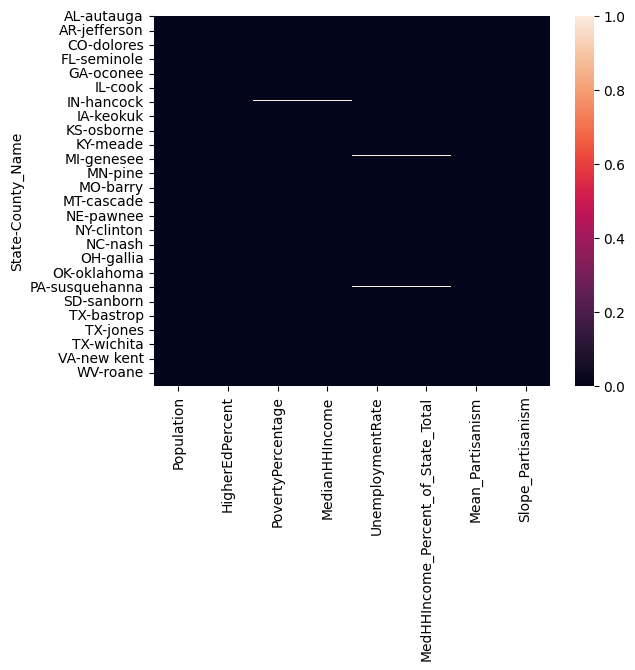

In [67]:
sns.heatmap(county_df.isna())

In [68]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3007 entries, ('AL', 'autauga') to ('WY', 'weston')
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Population                          3007 non-null   object
 1   HigherEdPercent                     3005 non-null   object
 2   PovertyPercentage                   3000 non-null   object
 3   MedianHHIncome                      3000 non-null   object
 4   UnemploymentRate                    2999 non-null   object
 5   MedHHIncome_Percent_of_State_Total  2999 non-null   object
 6   Mean_Partisanism                    3003 non-null   object
 7   Slope_Partisanism                   3003 non-null   object
dtypes: object(8)
memory usage: 341.0+ KB


In [69]:
county_df.dropna(inplace=True)

In [70]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2992 entries, ('AL', 'autauga') to ('WY', 'weston')
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Population                          2992 non-null   object
 1   HigherEdPercent                     2992 non-null   object
 2   PovertyPercentage                   2992 non-null   object
 3   MedianHHIncome                      2992 non-null   object
 4   UnemploymentRate                    2992 non-null   object
 5   MedHHIncome_Percent_of_State_Total  2992 non-null   object
 6   Mean_Partisanism                    2992 non-null   object
 7   Slope_Partisanism                   2992 non-null   object
dtypes: object(8)
memory usage: 275.4+ KB


#### Outliers

In [71]:
county_df = county_df.astype(float)

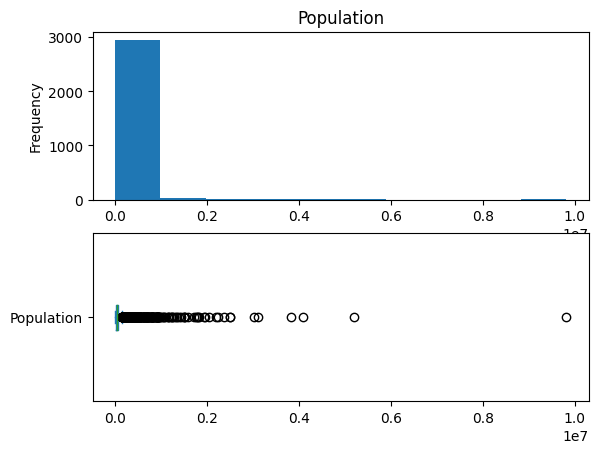

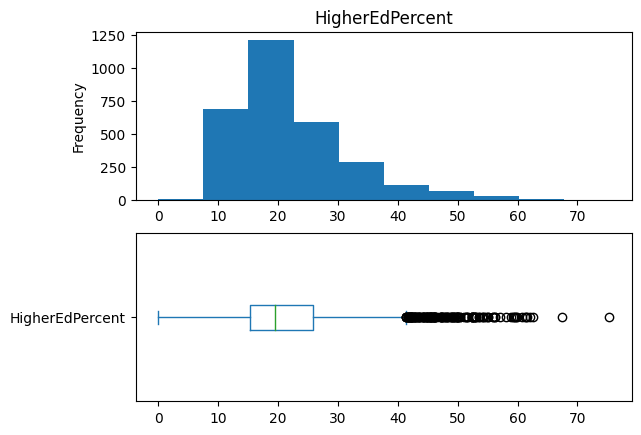

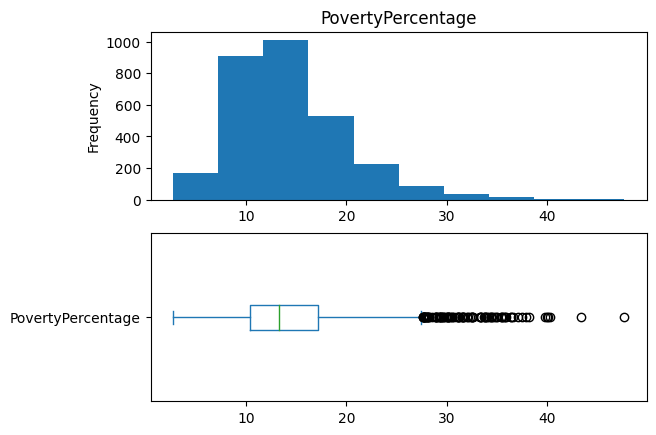

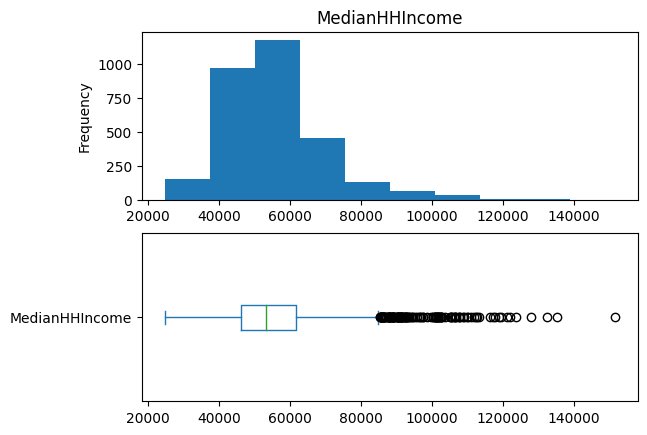

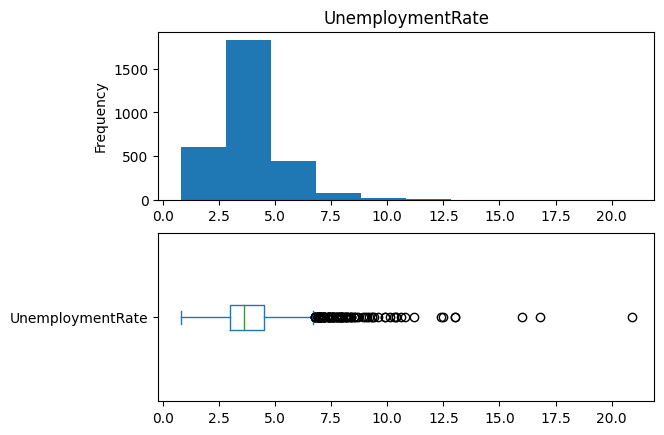

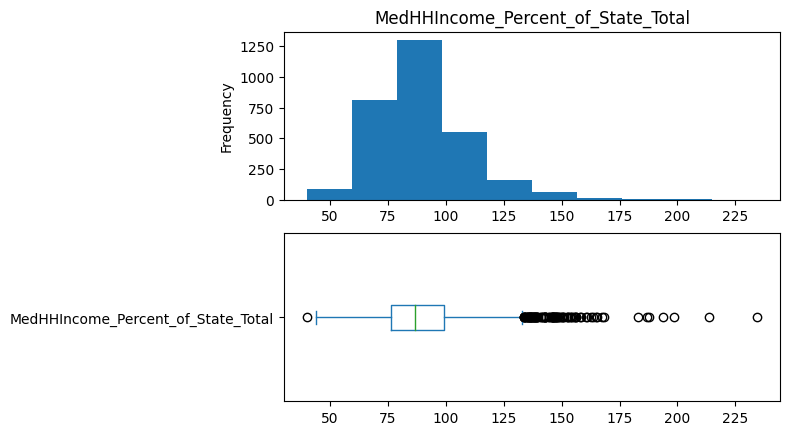

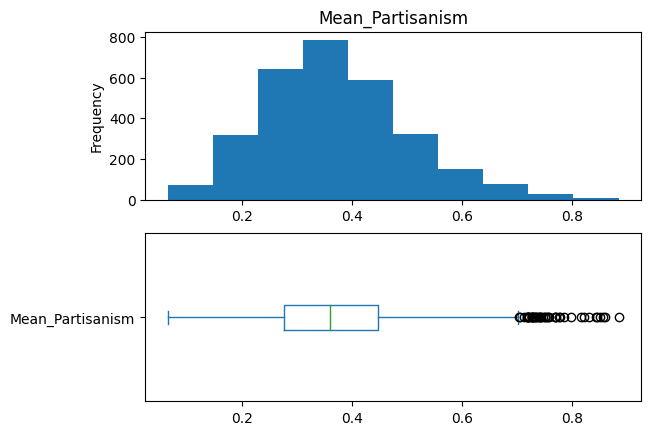

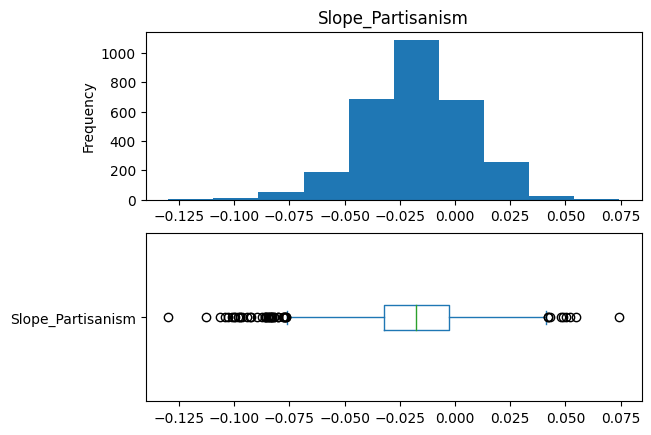

In [72]:
for att in county_df.columns:
    plt.subplot(2,1,1)
    county_df[att].plot.hist()
    plt.title(att)
    plt.subplot(2,1,2)
    county_df[att].plot.box(vert=False)
    plt.show()

In [73]:
county_df['log_Population'] = np.log(county_df.Population)
county_df['log_UnemploymentRate'] = np.log(county_df.UnemploymentRate)

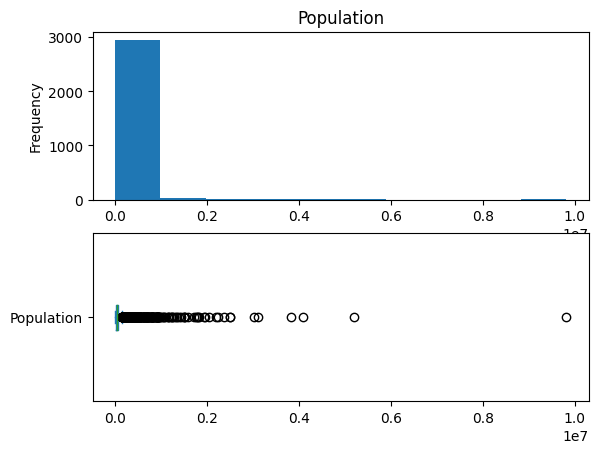

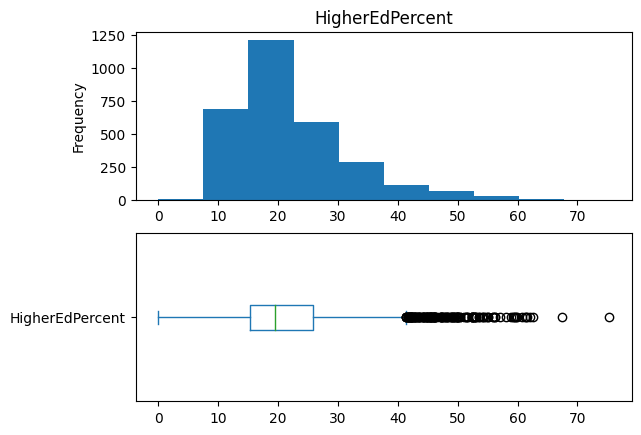

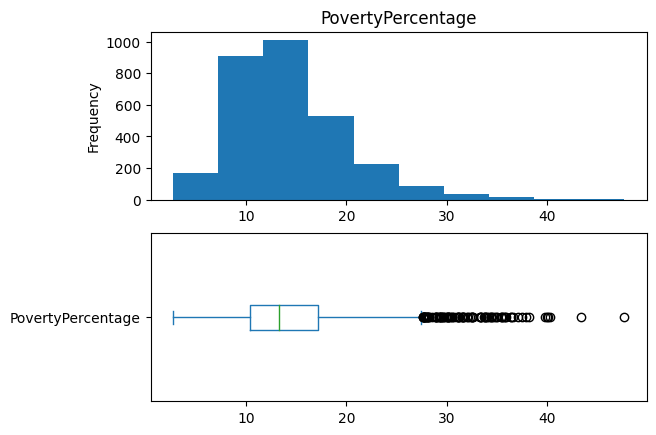

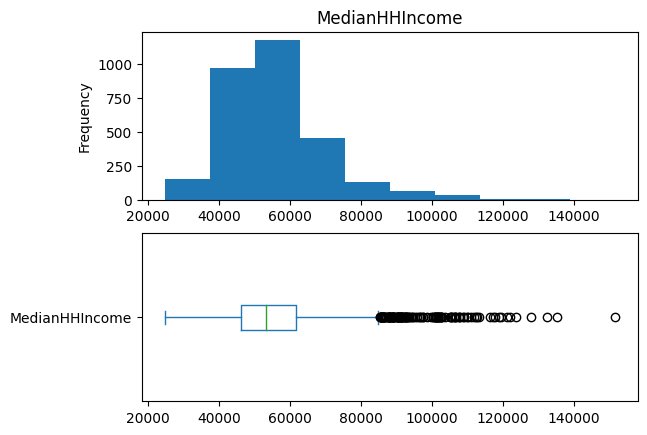

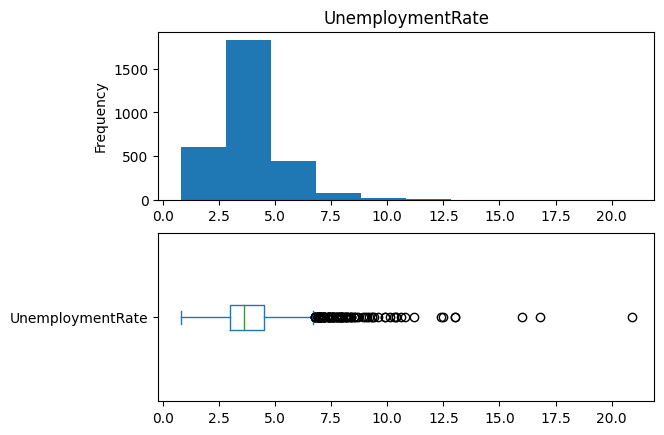

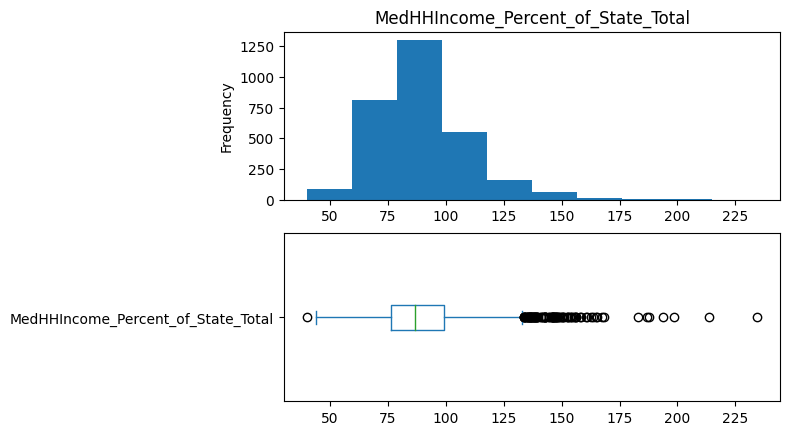

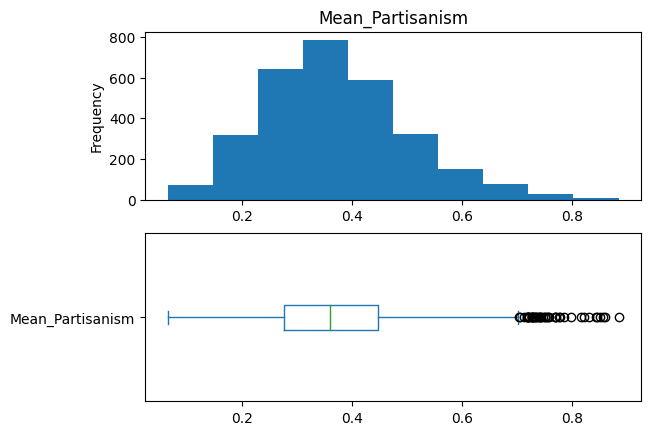

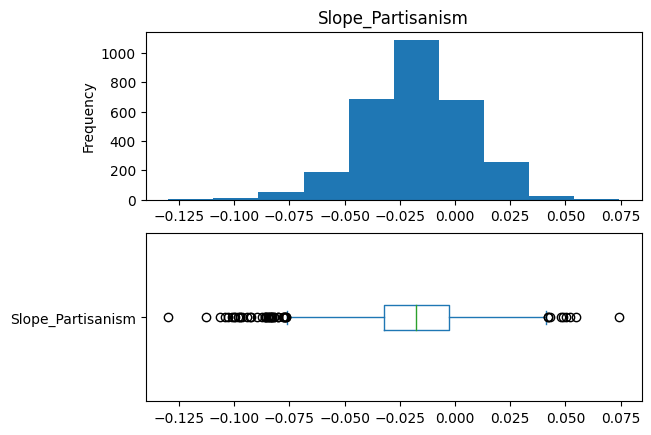

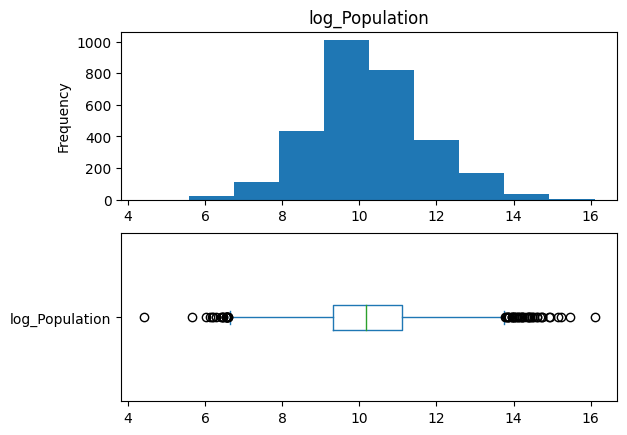

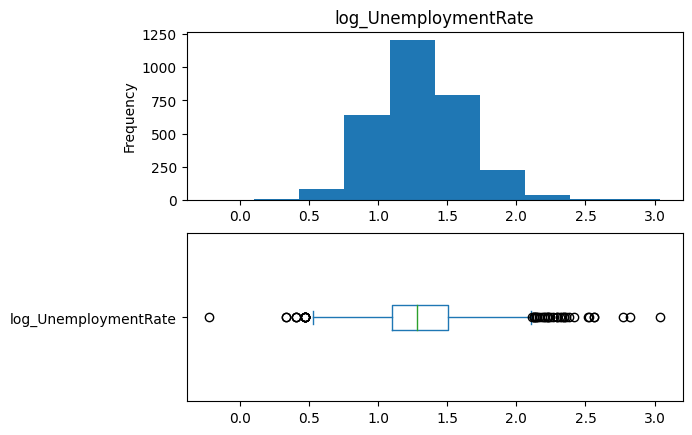

In [74]:
for att in county_df.columns:
    plt.subplot(2,1,1)
    county_df[att].plot.hist()
    plt.title(att)
    plt.subplot(2,1,2)
    county_df[att].plot.box(vert=False)
    plt.show()

#### Checking for data redundancy

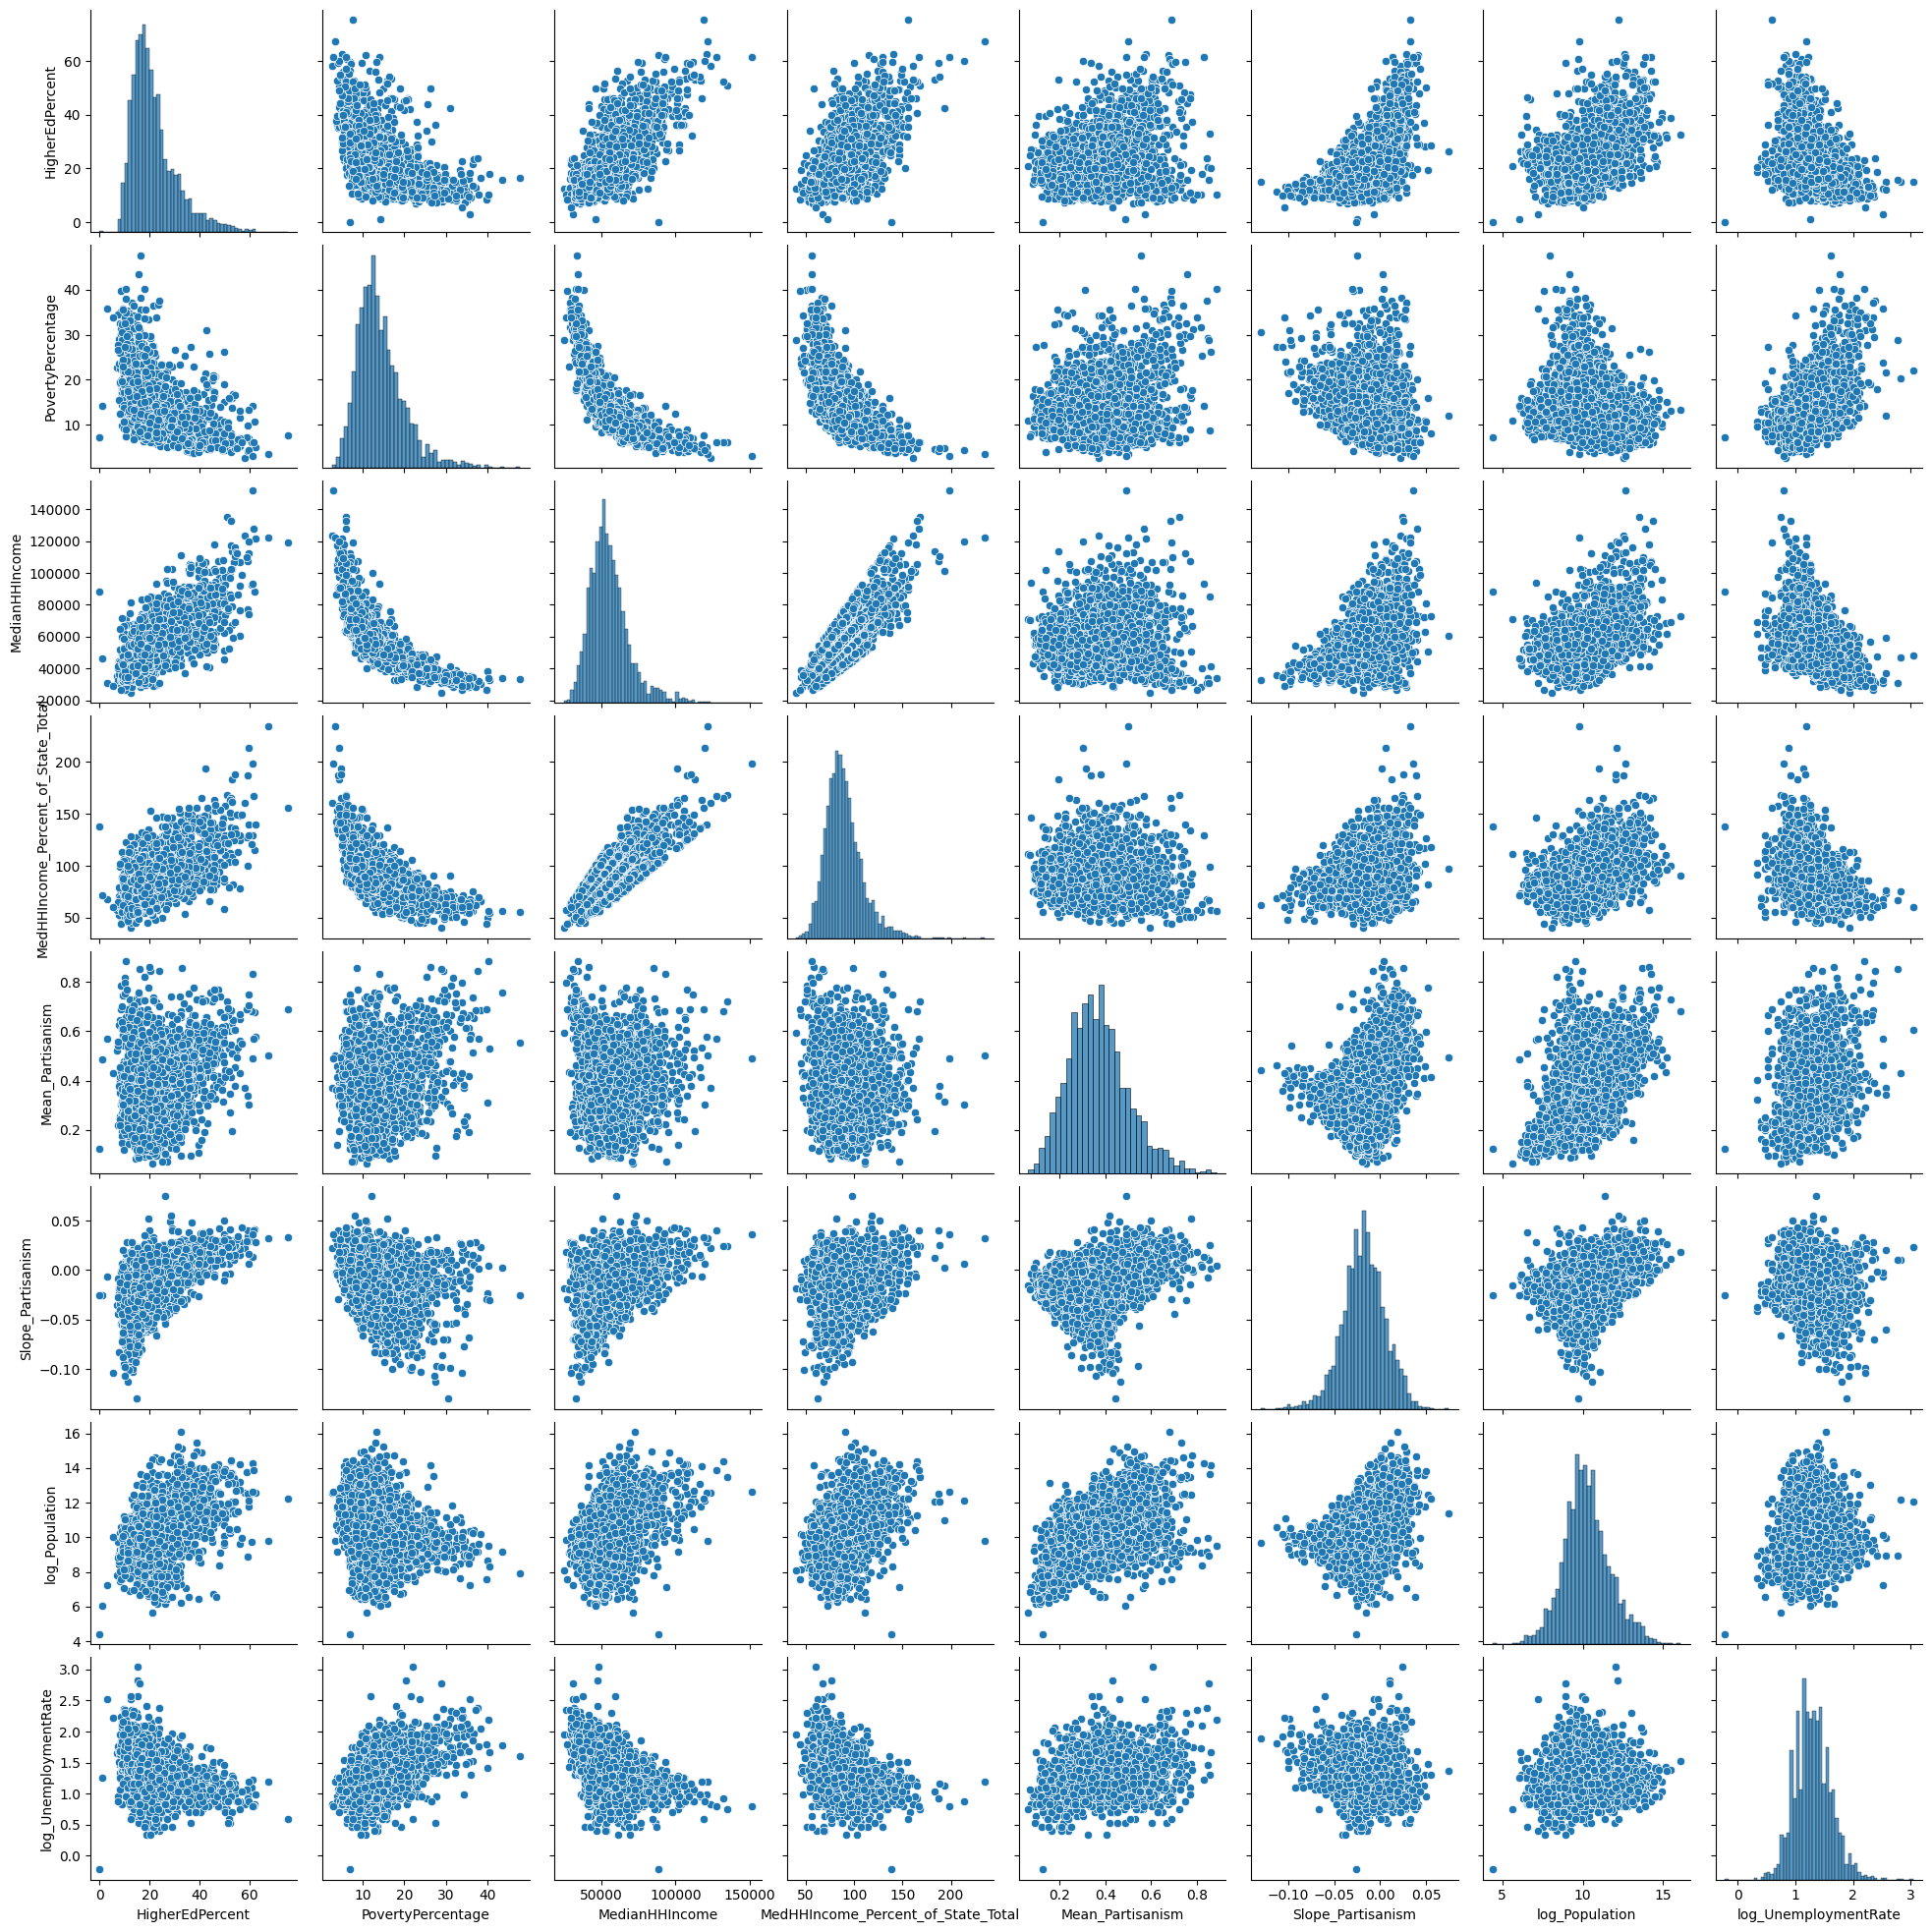

In [75]:
sns.pairplot(county_df.drop(columns=['Population','UnemploymentRate']))
plt.savefig('ScatterMatrix.png',dpi=500)

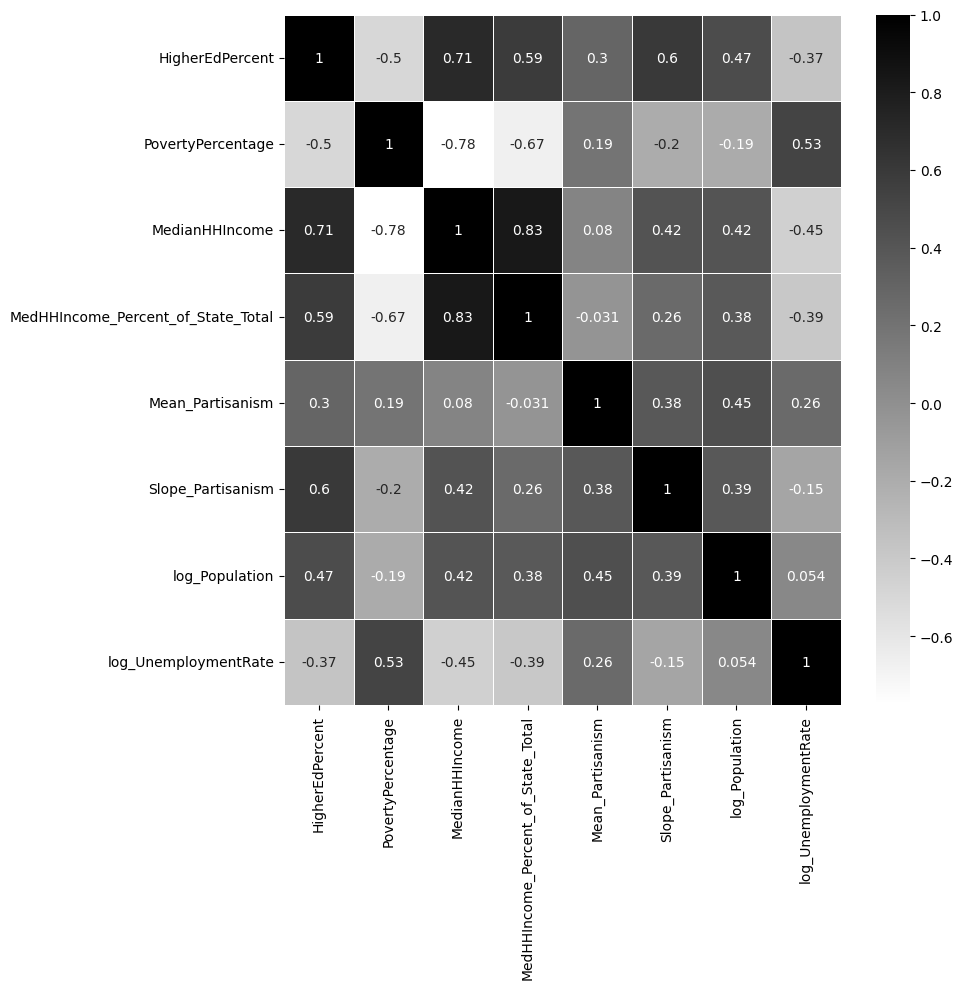

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(county_df.drop(columns=['Population','UnemploymentRate']).corr(),
            linewidths=.5, annot=True, cmap='binary')
plt.tight_layout()
plt.savefig('Corelation.png',dpi=500)

## The Analysis
### Using PCA to visualize the dataset

In [77]:
Xs = county_df.drop(columns= ['UnemploymentRate','Population','MedianHHIncome'])

Xs = (Xs -Xs.mean())/Xs.std()

In [78]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(Xs)

Xs_t = pd.DataFrame(pca.transform(Xs),index = Xs.index)
Xs_t.columns = ['PC{}'.format(i) for i in range(1,8)]

In [79]:
total_variance = Xs_t.var().sum()
dic = {'variance_percentage':Xs_t.var()/total_variance,
       'cumulative_variance_percentage':
       Xs_t.var().cumsum()/total_variance}

explanation_df = pd.DataFrame(dic)
explanation_df

variance_percentage  cumulative_variance_percentage
PC1             0.427531                        0.427531
PC2             0.260988                        0.688519
PC3             0.108101                        0.796620
PC4             0.066138                        0.862758
PC5             0.057072                        0.919830
PC6             0.043550                        0.963381
PC7             0.036619                        1.000000

<Axes: xlabel='PC1', ylabel='PC2'>

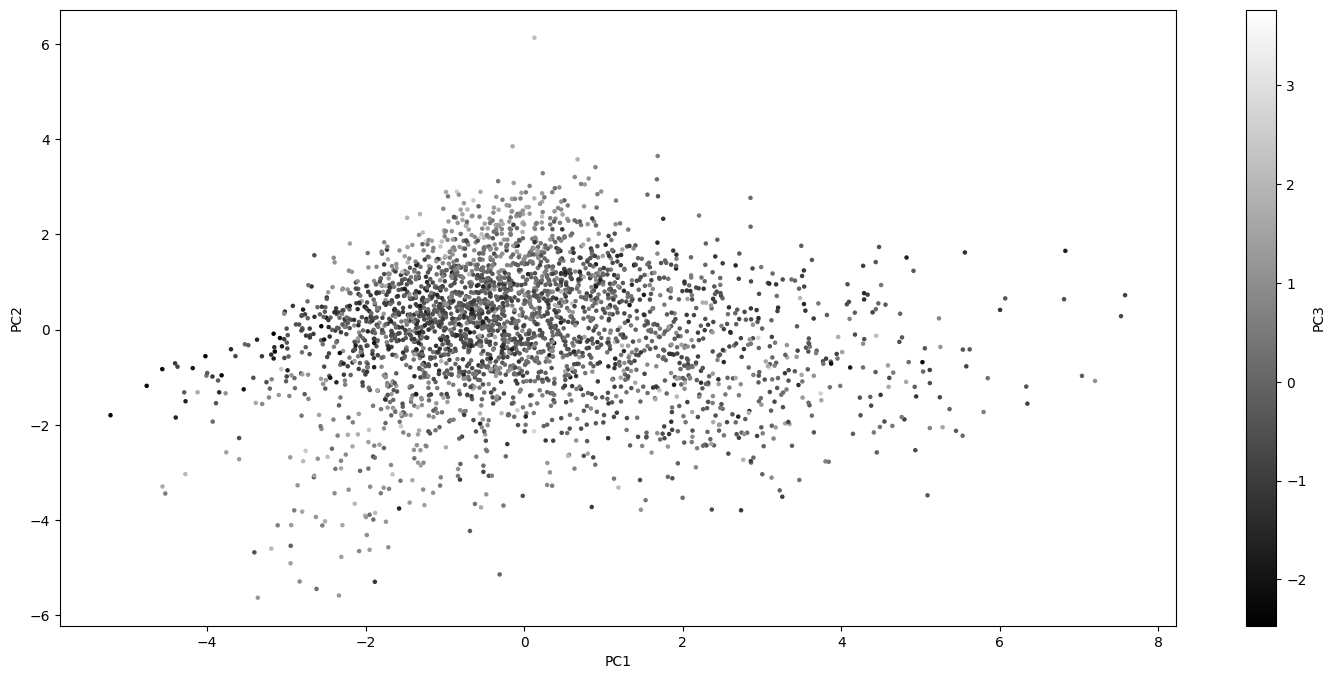

In [80]:
Xs_t.plot.scatter(x='PC1',y='PC2',c='PC3',sharex=False,colormap ='gray',marker='.',figsize=(18,8))

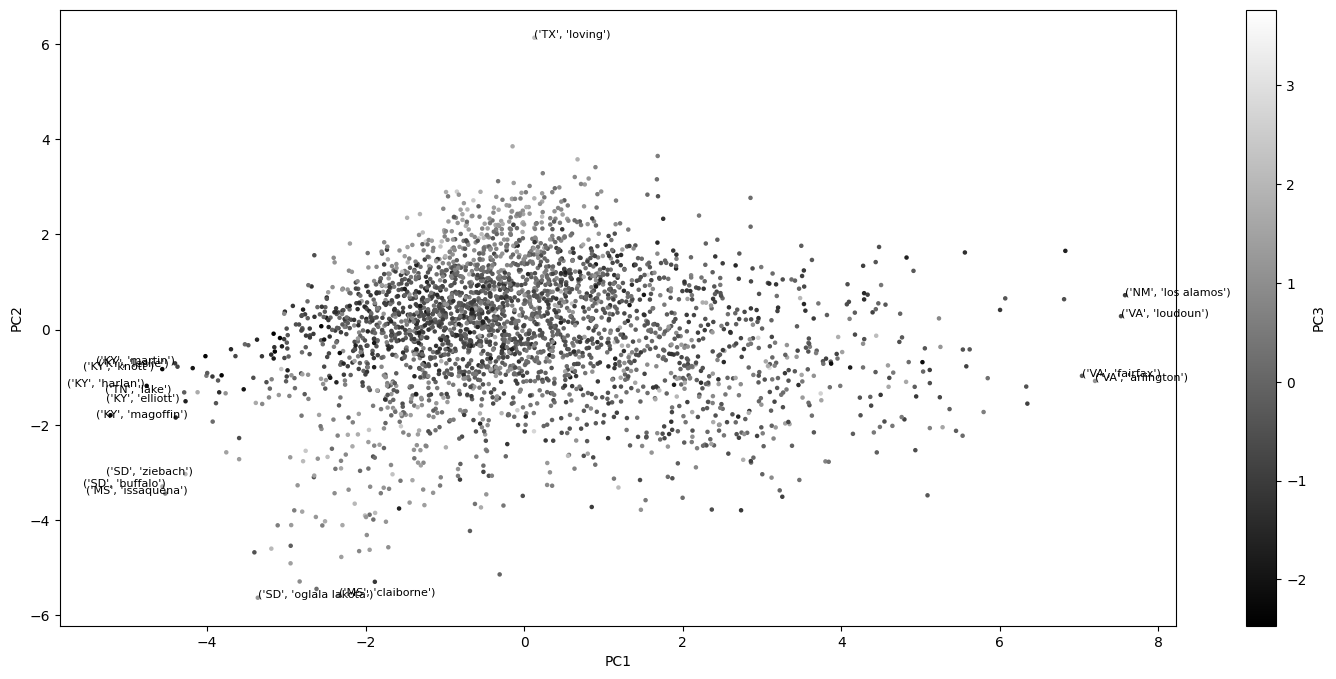

In [81]:
Xs_t.plot.scatter(x='PC1',y='PC2',c='PC3',sharex=False,colormap ='gray',marker='.',figsize=(18,8))

for i, row in Xs_t.iterrows():
    if(row.PC1>7 or row.PC2<-5.5 or row.PC2>4):
        plt.annotate(i, (row.PC1, row.PC2),size=8)
    if(row.PC1<-4.2):
        plt.annotate(i, (row.PC1-1, row.PC2),size=8)
plt.savefig('PCs.png',dpi=900)

### K-Means Clustering Analysis

In [82]:
Xs = county_df.drop(columns= ['UnemploymentRate','Population','MedianHHIncome'])

Xs = (Xs -Xs.min())/(Xs.max()-Xs.min())

In [83]:
# suppress warning
import warnings
warnings.filterwarnings("ignore")

### Computational experimentations to find K

In [84]:
from sklearn.cluster import KMeans
repetitions = ['R{}'.format(i) for i in range(1,10)]

SSE_results = pd.DataFrame(0.0, index = range(2,10), 
                       columns= repetitions)


for n_cluster in SSE_results.index:
    for col in SSE_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(Xs)
        SSE_results.at[n_cluster,col] = algort.inertia_ 
        # Inertia: Sum of distances of samples to their closest cluster center

SSE_results['Mean'] = SSE_results[repetitions].mean(axis=1)
SSE_results['Var'] = SSE_results[repetitions].var(axis=1)
SSE_results.sort_values('Mean')

R1          R2          R3          R4          R5          R6   
9  112.331215  112.336523  112.341103  112.307744  112.336154  112.345242  \
8  117.498465  117.603792  117.894805  117.498475  117.505135  117.499094   
7  124.030953  124.030961  124.037068  124.043584  124.035120  124.030305   
6  132.089460  132.091444  132.090047  132.090821  132.089599  132.091444   
5  143.163355  143.163183  143.163336  143.164534  143.166116  143.163355   
4  161.356621  161.356635  161.356568  161.357734  161.356884  161.356606   
3  185.109654  185.108160  185.103589  185.107824  185.102881  185.109654   
2  229.964364  229.964911  229.965229  229.964305  229.964911  229.964911   

           R7          R8          R9        Mean           Var  
9  112.313373  112.332173  112.334503  112.330892  1.533874e-04  
8  117.603792  117.497662  117.505463  117.567409  1.707350e-02  
7  124.118721  124.118963  124.037302  124.053664  1.382727e-03  
6  132.087005  132.091420  132.090747  132.090221  2.050661e-06  
5  143.163183  143.163336  143.163240  143.163738  9.714619e-07  
4  161.356568  161.356568  161.356845  161.356781  1.421975e-07  
3  185.108052  185.102997  185.105182  185.106444  7.795190e-06  
2  229.964364  229.964911  229.964911  229.964757  1.067848e-07

<Axes: >

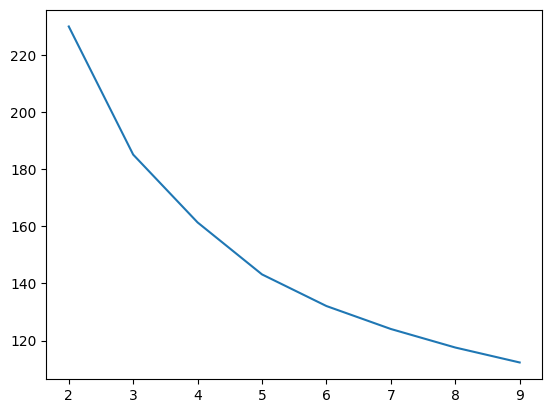

In [85]:
SSE_results.Mean.plot()

In [86]:
from sklearn.metrics import silhouette_score
repetitions = ['R{}'.format(i) for i in range(1,10)]

SIL_results = pd.DataFrame( index = range(2,10), 
                       columns= repetitions)


for n_cluster in SIL_results.index:
    for col in SIL_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(Xs)
        SIL_results.at[n_cluster,col] = silhouette_score(Xs,algort.labels_)
        
SIL_results['Mean'] = SIL_results[repetitions].mean(axis=1)
SIL_results['Var'] = SIL_results[repetitions].var(axis=1)
SIL_results.sort_values('Mean',ascending=False)

R1        R2        R3        R4        R5        R6        R7   
2  0.288753  0.288711  0.288711  0.288753  0.288753  0.288753  0.288753  \
3   0.23685  0.229209  0.227908  0.234918  0.227908  0.236623  0.229209   
4  0.208503  0.207904  0.208503  0.208503  0.208613  0.208571  0.207953   
5  0.200675  0.200598  0.200743  0.200603  0.200675  0.200675  0.200675   
6  0.194966  0.194563  0.194871  0.195016  0.195005  0.195005  0.194463   
7  0.177632   0.17764  0.177093  0.178258   0.17302   0.17735  0.177628   
8  0.170517  0.170143  0.170466   0.16962  0.170427  0.170203  0.170423   
9  0.166801  0.169481  0.164456  0.163725  0.168101  0.164612  0.164445   

         R8        R9      Mean       Var  
2  0.288753  0.288767  0.288745       0.0  
3  0.228053   0.23685  0.231948  0.000018  
4  0.208503   0.20853  0.208398       0.0  
5  0.200675  0.200675  0.200666       0.0  
6  0.194734  0.194859  0.194831       0.0  
7  0.176995   0.17749  0.177012  0.000002  
8  0.172717  0.169884  0.170489  0.000001  
9  0.167085  0.163497    0.1658  0.000005

<Axes: >

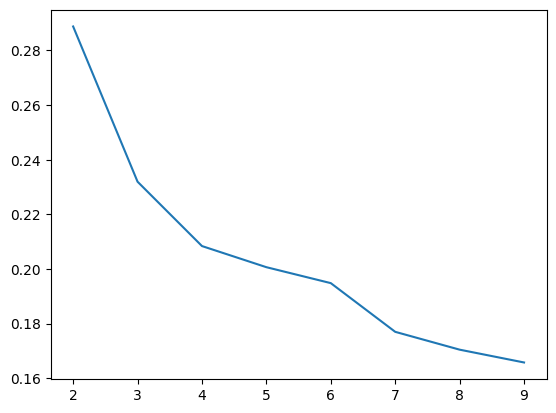

In [87]:
SIL_results.Mean.plot()

### The clustering

In [88]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Xs)

for i in range(5):
    BM = kmeans.labels_==i
    print('Cluster {}: Size={}'.format(i,sum(BM)))
    print(county_df[BM].index.values)
    print('--------------------------------------')

Cluster 0: Size=815
[('AL', 'bibb') ('AL', 'cherokee') ('AL', 'clay') ('AL', 'colbert')
 ('AL', 'coosa') ('AL', 'covington') ('AL', 'crenshaw') ('AL', 'dekalb')
 ('AL', 'escambia') ('AL', 'etowah') ('AL', 'fayette') ('AL', 'franklin')
 ('AL', 'henry') ('AL', 'jackson') ('AL', 'lamar') ('AL', 'lawrence')
 ('AL', 'marion') ('AL', 'marshall') ('AL', 'randolph') ('AL', 'walker')
 ('AL', 'washington') ('AL', 'winston') ('AZ', 'gila') ('AZ', 'graham')
 ('AZ', 'la paz') ('AZ', 'mohave') ('AR', 'ashley') ('AR', 'baxter')
 ('AR', 'boone') ('AR', 'bradley') ('AR', 'calhoun') ('AR', 'clay')
 ('AR', 'cleburne') ('AR', 'cleveland') ('AR', 'columbia')
 ('AR', 'conway') ('AR', 'crawford') ('AR', 'cross') ('AR', 'dallas')
 ('AR', 'drew') ('AR', 'franklin') ('AR', 'fulton') ('AR', 'grant')
 ('AR', 'greene') ('AR', 'hempstead') ('AR', 'hot spring')
 ('AR', 'howard') ('AR', 'independence') ('AR', 'izard') ('AR', 'jackson')
 ('AR', 'johnson') ('AR', 'lafayette') ('AR', 'lawrence')
 ('AR', 'lincoln') ('AR'

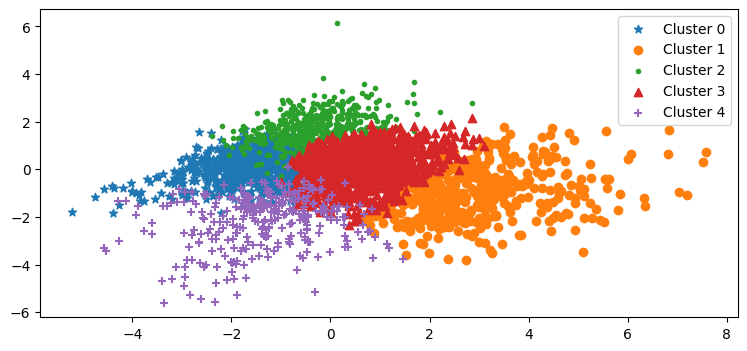

In [89]:
clusters = ['Cluster {}'.format(i) for i in range(5)]
plt.figure(figsize=(9,4))
markerlist = ['*','o','.','^','+']
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    wdf = Xs_t[BM]
    plt.scatter(wdf.PC1,wdf.PC2, marker =markerlist[i] ,label=clst)
plt.legend()
plt.savefig('ClustersInPCs.png',dpi=900)

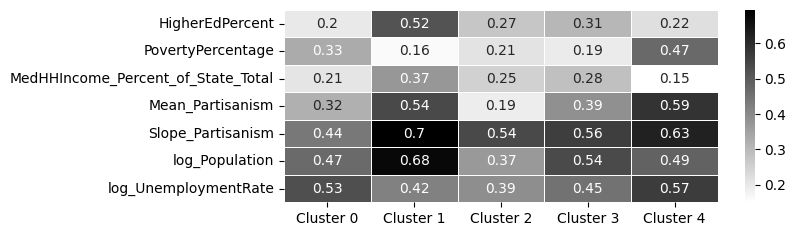

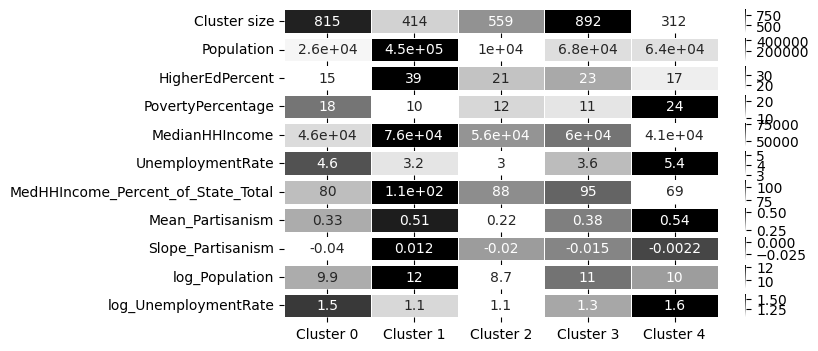

In [90]:
clusters = ['Cluster {}'.format(i) for i in range(5)]

Centroids = pd.DataFrame(0.0, index =  clusters, columns = Xs.columns)
centrodis_orig = pd.DataFrame(0.0, index =  clusters, columns = county_df.columns)
size_df = pd.DataFrame(0.0, index =  clusters, columns = ['Cluster size'])

plt.figure(figsize=(7,2.5))
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].mean(axis=0)
    centrodis_orig.loc[clst] = county_df[BM].mean()
    size_df.loc[clst] = sum(BM)

sns.heatmap(Centroids.transpose(), linewidths=.5, annot=True, cmap='binary')
plt.show()

plt.figure(figsize=(7,4))
plt.subplot(11,1,1)
sns.heatmap(size_df.transpose(), linewidths=.5, annot=True, cmap='binary',fmt='g')
plt.yticks(rotation=0)
for i,att in enumerate(county_df.columns):
    plt.subplot(11,1,i+2)
    sns.heatmap(centrodis_orig[[att]].transpose(), linewidths=.5, annot=True, cmap='binary')
    plt.yticks(rotation=0)
plt.show()


From studying we can see the following patterns and relationships:

* Clusters 0, 1, and 2 are Republican-leaning, and clusters 3 and 4 are Democrat-leaning.
* Cluster 2 is the one that has the most in common with all the rest of the clusters. This cluster is the best characterized to be the most moderate and affluent among all the Republican-leaning counties.
* Cluster 0 only has a relationship with clusters 2 and 3 and is completely cut off from clusters 4 and 5, which are the only Democrat-leaning clusters. This cluster is best characterized by the most Republican-leaning cluster with the lowest unemployment rate and population among all the clusters.
* Cluster 1 has a relationship with all the clusters except cluster 3. This cluster is best characterized as having the lowest
HigherEdPercent value among all the clusters, and the lowest MedianHHIncome and highest PovertyPercentage
and UnemploymentRate values among the Republican-leaning clusters.
* Another interesting pattern about cluster 1 is that this cluster has the fastest movement toward becoming more Republican-leaning
among all the clusters.
* Cluster 4, which is a Democrat-learning cluster, has more in common with two Republican-leaning clusters, clusters 1 and 2. This
cluster is best characterized as having the highest PovertyPercentage and UnemploymentRate values and the lowest
MedianHHIncome value among all clusters.
* Another interesting pattern about cluster 4 is that while this cluster is the most Democrat-leaning cluster, it is the only cluster that
has been moving in the opposite direction in terms of partisanism.
* Cluster 3 has more of a relationship with cluster 2, which is a Republican-leaning cluster, than cluster 4, which is the only other
Democrat-leaning cluster. Among all the clusters, this cluster seems to be a unique one. This cluster is best characterized by the
highest Population and HigherEdPercent values and the lowest PovertyPercentage value.
* Another interesting pattern about cluster 3 is that it is the only cluster that has a movement toward becoming more Democratleaning; however, its movement is the slowest among all the clusters